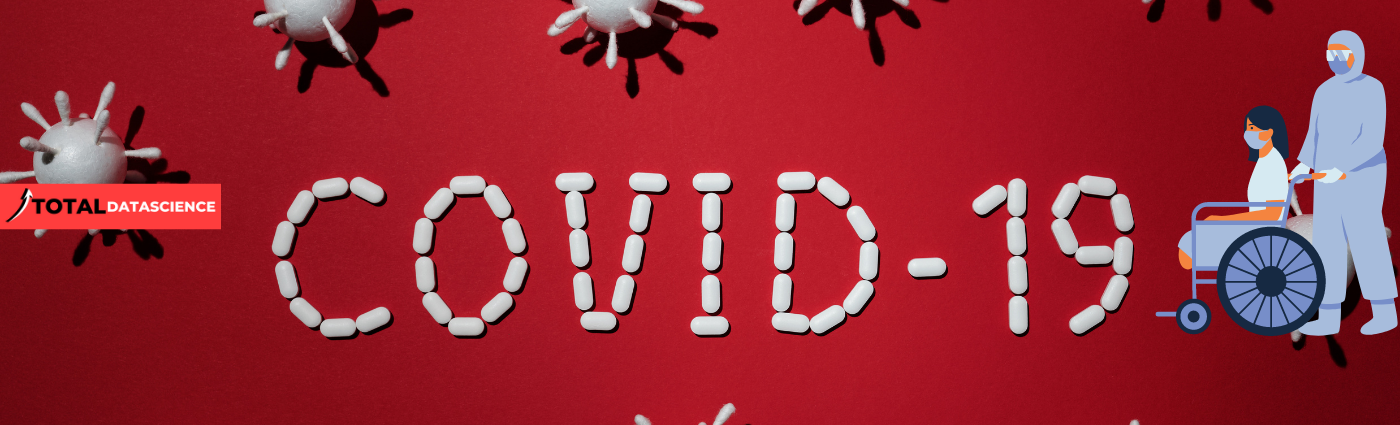

## Author: **MrBriit**

[Click here to follow me on Linkedin](https://www.linkedin.com/in/mrbriit/)

<br>

[Subscrice Youtube and Click on Notification button for more free tutorials and live sessons.](https://www.youtube.com/channel/UC7YlhTyLxk_B1ZcY8CUpCVQ?sub_confirmation=1)

<br>

The **Covid19** pandemic is one of the most detrimental things that has happened to humanity. It is even paramount to highlight that covid19 has claim lives of humans more than **World War I** and **World War II**. 

It is therefore crucial for us to analyze and have insights about the impact this evil disease is having on humanity.

This notebook serves to analyze and visualize the progress of this pandemic from various angles and perspectives. Also, it helps you to re-enforce your concepts of **Python** and **Data Analysis**!

**Table of content:**

    1. Global Statistics
    2. Visualize Data by Country
      2.1. USA (The Leader)
      2.2. China (The Origin)
      2.3. UK (The Mutant)
      2.4. Italy (The Early Chaos)
      2.5. India (The Latest Chaos)
    3. Visualize Data by Continent
      3.1. Asia
      3.2. Europe
      3.3. Africa
      3.4. North America
      3.5. South America
      3.6. Australia/Oceania
    4. Most Affected Countries
    

**NOTE**: This tutorial assumes that you have basics of **Python**.

If not then go through the [**Python Crash Course on UDEMY**](https://bit.ly/best-udemy-python), which will teach basics to advanced concepts of Python, before starting out this tutorial.

<br>

**Let's get started**

<br>

**Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
 
# import os
import math

In [ ]:
df_summary = pd.read_csv('/content/worldometer_coronavirus_summary_data.csv') 
df_summary.head()

country continent  ...  total_tests_per_1m_population  population
0  Afghanistan      Asia  ...                        11654.0    39717807
1      Albania    Europe  ...                       247017.0     2874947
2      Algeria    Africa  ...                         5180.0    44565141
3      Andorra    Europe  ...                      2501971.0       77377
4       Angola    Africa  ...                        16872.0    33784208

[5 rows x 12 columns]

In [ ]:
df= pd.read_csv('/content/worldometer_coronavirus_daily_data.csv')
df.head()

date      country  ...  cumulative_total_deaths  daily_new_deaths
0  2020-2-15  Afghanistan  ...                      0.0               NaN
1  2020-2-16  Afghanistan  ...                      0.0               NaN
2  2020-2-17  Afghanistan  ...                      0.0               NaN
3  2020-2-18  Afghanistan  ...                      0.0               NaN
4  2020-2-19  Afghanistan  ...                      0.0               NaN

[5 rows x 7 columns]

In [ ]:
df.dtypes

date                        object
country                     object
cumulative_total_cases     float64
daily_new_cases            float64
active_cases               float64
cumulative_total_deaths    float64
daily_new_deaths           float64
dtype: object

We can see that the date is in wrong data type format. It is represented as **'Object'** but it is supposed to be in a **datetime** format.

We will therefore use the 

In [ ]:
from datetime import datetime, timedelta
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

In [ ]:
df = pd.read_csv('/content/worldometer_coronavirus_daily_data.csv',parse_dates=['date'], date_parser=dateparse)
df.head()

date      country  ...  cumulative_total_deaths  daily_new_deaths
0 2020-02-15  Afghanistan  ...                      0.0               NaN
1 2020-02-16  Afghanistan  ...                      0.0               NaN
2 2020-02-17  Afghanistan  ...                      0.0               NaN
3 2020-02-18  Afghanistan  ...                      0.0               NaN
4 2020-02-19  Afghanistan  ...                      0.0               NaN

[5 rows x 7 columns]

In [ ]:
df.dtypes

date                       datetime64[ns]
country                            object
cumulative_total_cases            float64
daily_new_cases                   float64
active_cases                      float64
cumulative_total_deaths           float64
daily_new_deaths                  float64
dtype: object

Now we have the **date** in the right form.

<br>

##**1. Global Statistics**

In [ ]:
trace = go.Pie(labels=['Total Recovered', 'Total Active', 'Total Deaths'],
               values=[df_summary.total_recovered.sum(), df_summary.active_cases.sum(), df_summary.total_deaths.sum()], 
               title="<b>Global Covid19 <br> Cases</b>",
               title_font_size=18,
               hovertemplate="<b>%{label}</b><br>%{value}<br><i>%{percent}</i>",
               #hoverinfo='percent+value+label', 
               textinfo='percent',
               textposition='inside',
               hole=0.6,
               showlegend=True,
               marker=dict(colors=["#A904DE", "#FF5733", "C5A803"],
                           line=dict(color='#000000',
                                     width=2),
                          ),
               name=""
              )
fig=go.Figure(data=[trace])
fig.show()

From the above observations, we can notice that we have a **recovery** rate of **89.4%** of the cases whereas **2.08%** ended up **death** cases, also **8.5%** are still **active** cases currently. While a 2.07% death rate might not seem like much for non-data scientists, this number is exceptionally high, especially when we're talking about people's lives! Now, many would argue that those are merely reported cases, and many other cases went unreported cause the majority of people infected didn't even test themselves. That being said, and looking at the actual numbers rather than percentages, the total reported coronavirus-caused deaths cases accumulates to over 3.5 million deaths!

To further help in conveying the insane numbers we got up in this pie-chart, I've written a small handy script that compares each number to the population of some countries! Take a look at the cell below to get a better feel for the numbers!

<br>

#**2. Visualize Covid19 Data by Country**

Let's create a small function that will put commas in our figures to make it readable.

In [ ]:
def add_commas(num):
    out = ""
    counter = 0
    for n in num[::-1]: #counting the digits jumping 3 digits at a time from the right
        counter += 1 #keep counting 
        if counter == 4: #if it's a 4 digit number, then just count once
            counter = 1  #if it's a 4 digit number, then just count once
            out = "," + out # a 'comma' and 'nothing' , we will  use it below
        out = n + out #noe add the comma and 'nothing' after counting every 3 digits from the right.
    return out

In [ ]:
add_commas(str(200000000))

'200,000,000'

###**Confirmed Cases Around The Globe**

In [ ]:
log_scale_vals = list(range(0,25,2))
scale_vals = (np.exp2(log_scale_vals)).astype(int).astype(str)
scale_vals = list(map(add_commas, scale_vals))
scale_vals 

['1',
 '4',
 '16',
 '64',
 '256',
 '1,024',
 '4,096',
 '16,384',
 '65,536',
 '262,144',
 '1,048,576',
 '4,194,304',
 '16,777,216']

In [ ]:
df_summary['log(Total Confirmed)'] = np.log2(df_summary['total_confirmed'])
df_summary['Total Confirmed'] = df_summary['total_confirmed'].apply(lambda x: add_commas(str(x)))
 
fig = px.choropleth(df_summary,
                    locations="country",
                    color="log(Total Confirmed)",
                    locationmode = 'country names',
                    hover_name='country',
                    hover_data=['Total Confirmed'],
                    color_continuous_scale='reds',
                    title = '<b>Covid19 Confirmed Cases Around The Globe</b>')
 
 
log_scale_vals = list(range(0,25,2))
scale_vals = (np.exp2(log_scale_vals)).astype(int).astype(str)
 
scale_vals = list(map(add_commas, scale_vals))
 
fig.update_layout(title_font_size=22,
                  margin={"r":20, "l":30},
                  coloraxis={#"showscale":False,
                            "colorbar":dict(title="<b>Confirmed Cases</b><br>",
                                            #range=[np.log(50), np.log(6400)],
                                            titleside="top",
                                            tickmode="array",
                                            tickvals=log_scale_vals,
                                            ticktext=scale_vals
                                        )},
                 )
 
fig.show()

<br>

##**Total Coronavirus Confirmed Cases Breakdown by Country**

In [ ]:
fig = px.treemap(df_summary, path=["country"], values="total_confirmed", height = 750,
                 title="<b>Total Confirmed Cases Breakdown by Country</b>",
                 color_discrete_sequence = px.colors.qualitative.Set3)

fig.update_traces(textinfo = "label+text+value")
fig.show()

It is obvious from the above plot that **USA** has the largest total cases followed by **India** and then **Brazil** and so on...

#**Visualise By Country**

In [ ]:
#pip install --upgrade plotly

In [ ]:
def plot_stats(country):
    if country in ["USA", "UK"]:
        country_prefix = "the "
    else:
        country_prefix = ""
    df_country = df[df.country == country]
    df_country.set_index('date', inplace=True)

    # Plot 1
    if not all(df_country.cumulative_total_cases.isna()):
        layout = go.Layout(
            yaxis={'range':[0, df_country.cumulative_total_cases[-1] * 1.05],
                  'title':'Coronavirus Confirmed Cases'},
            xaxis={'title':''},
            )

        fig = px.area(df_country, x=df_country.index, y="cumulative_total_cases",
                      title=f"<b>Cumulative Total Confirmed Cases in {country_prefix}{country}<br>from {df_country.index[0].strftime('%Y-%m-%d')} till {df_country.index[-1].strftime('%Y-%m-%d')}</b>",
                      template='plotly_dark')

        fig.update_traces(line={'width':5})

        fig.update_layout(layout)
        fig.show()

    # Plot 2
    if not all(df_country.daily_new_cases.isna()):
        layout = go.Layout(
            yaxis={'range':[0, df_country.daily_new_cases.max() * 1.05],
                  'title':'Daily New Coronavirus Confirmed Cases'},
            xaxis={'title':''},
            template='plotly_dark',
            title=f"<b>Daily New Cases in {country_prefix}{country}<br>from {df_country.index[0].strftime('%Y-%m-%d')} till {df_country.index[-1].strftime('%Y-%m-%d')}</b>",
            )

        MA7 = df_country.daily_new_cases.rolling(7).mean().dropna().astype(int)

        fig = go.Figure()
        fig.add_trace(go.Bar(name="Daily Cases", x=df_country.index, y=df_country.daily_new_cases))
        fig.add_trace(go.Scatter(name="7-Day Moving Average", x=df_country.index[df_country.shape[0] - MA7.shape[0]:], y=MA7, line=dict(width=3)))

        fig.update_layout(layout)
        fig.show()

    # Plot 3
    if not all(df_country.cumulative_total_deaths.isna()):
        layout = go.Layout(
            yaxis={'range':[0, df_country.cumulative_total_deaths[-1] * 1.05],
                  'title':'Coronavirus Deaths'},
            xaxis={'title':''},
            )

        fig = px.area(df_country, x=df_country.index, y="cumulative_total_deaths",
                      title=f"<b>Cumulative Total Deaths in {country_prefix}{country}<br>from {df_country.index[0].strftime('%Y-%m-%d')} till {df_country.index[-1].strftime('%Y-%m-%d')}</b>",
                      template='plotly_dark')

        fig.update_traces(line={'color':'red', 'width':5})

        fig.update_layout(layout)
        fig.show()

    # Plot 4
    if not all(df_country.daily_new_deaths.isna()):
        layout = go.Layout(
            yaxis={'range':[0, df_country.daily_new_deaths.max() * 1.05],
                  'title':'Daily New Coronavirus Deaths'},
            xaxis={'title':''},
            template='plotly_dark',
            title=f"<b>Daily Deaths in {country_prefix}{country}<br>from {df_country.index[0].strftime('%Y-%m-%d')} till {df_country.index[-1].strftime('%Y-%m-%d')}</b>",
            )

        MA7 = df_country.daily_new_deaths.rolling(7).mean().dropna().astype(int)

        fig = go.Figure()
        fig.add_trace(go.Bar(name="Daily Deaths", x=df_country.index, y=df_country.daily_new_deaths, marker_color='red'))
        fig.add_trace(go.Scatter(name="7-Day Moving Average", x=df_country.index[df_country.shape[0] - MA7.shape[0]:], y=MA7, line={'width':3, 'color':'white'}))

        fig.update_layout(layout)
        fig.show()

    # Plot 5
    if not all(df_country.active_cases.isna()):
        layout = go.Layout(
            yaxis={'range':[0, df_country.active_cases.max() * 1.05],
                  'title':'Active Coronavirus Cases'},
            xaxis={'title':''},
            )

        fig = px.line(df_country, x=df_country.index, y="active_cases",
                      title=f"<b>Active Cases in {country_prefix}{country}<br>from {df_country.index[0].strftime('%Y-%m-%d')} till {df_country.index[-1].strftime('%Y-%m-%d')}</b>",
                      template='plotly_dark')

        fig.update_traces(line={'color':'yellow', 'width':5})

        fig.update_layout(layout)
        fig.show()

##**2.1. USA (The Leader)**

In [ ]:
plot_stats('USA')

##**2.2. China (The Origin)**

In [ ]:

plot_stats('China')

<br>

##**2.3. UK (The Mutant)**

In [ ]:
plot_stats('UK')

<br>

##**2.4. Italy (The Early Chaos)**

In [ ]:
plot_stats('Italy')

<br>

##**2.5. India (The Latest Chaos)**

In [ ]:
plot_stats("India")

<br>

#**3. Most Affected Countries**

In [ ]:
df[df.date == df.date.min()]

date country  ...  daily_new_deaths  continent
20636 2020-01-22   China  ...               NaN       Asia

[1 rows x 8 columns]

In [ ]:

fig = px.area(df[df.country.isin(df[df.date == df.date.max()].sort_values("active_cases", ascending=False).iloc[:20].country)].sort_values("active_cases", ascending=False),
              x="date", y="active_cases", color="country", template="plotly_dark")#, groupnorm='percent')

fig.update_traces(line={"width":1.25})
fig.update_layout(title = f"Top 20 Countries with Most Active Cases on {df.date.max().strftime('%Y-%m-%d')}",
                  xaxis={"title": ""},
                  yaxis={"title":"Active Cases"})

<br>

#**4. ASSIGNMENT: Visualize Data by Continent**




**Sample solution Code**

<br>


<br>

First add **continent** column to the **df** dataframe so that you can use the **df** dataframe to do this.

See sample code below:

In [ ]:
#@title
df['continent'] = df.apply(lambda row: df_summary[df_summary.country == row.country].iloc[0].continent, axis=1)

df

date      country  ...  daily_new_deaths  continent
0     2020-02-15  Afghanistan  ...               NaN       Asia
1     2020-02-16  Afghanistan  ...               NaN       Asia
2     2020-02-17  Afghanistan  ...               NaN       Asia
3     2020-02-18  Afghanistan  ...               NaN       Asia
4     2020-02-19  Afghanistan  ...               NaN       Asia
...          ...          ...  ...               ...        ...
86443 2020-06-17  South Korea  ...               1.0       Asia
86444 2020-06-18  South Korea  ...               1.0       Asia
86445 2020-06-19  South Korea  ...               0.0       Asia
86446 2020-06-20  South Korea  ...               0.0       Asia
86447 2020-06-21  South Korea  ...               NaN       Asia

[86448 rows x 8 columns]

In [ ]:
#@title

def plot_continent(continent):
    df_continent = df[df.continent == continent]
    fig = px.line(df_continent, x="date", y="cumulative_total_cases", color="country", #log_y=True,
                  line_group="country", hover_name="country", template="plotly_dark")

    annotations = []
    # Adding labels
    ys = []
    for tr in fig.select_traces():
        ys.append(tr.y[-1])
    y_scale = 0.155 / max(ys)
    for tr in fig.select_traces():
        # labeling the right_side of the plot
        size = max(1, int(math.log(tr.y[-1], 1.1) * tr.y[-1] * y_scale))
        annotations.append(dict(x=tr.x[-1] + timedelta(hours=int((2 + size/5) * 24)), y=tr.y[-1],
                                xanchor='left', yanchor='middle',
                                text=tr.name,
                                font=dict(family='Arial',
                                          size=7+int(size/2)
                                         ),
                                showarrow=False))
        fig.add_trace(go.Scatter(
            x=[tr.x[-1]],
            y=[tr.y[-1]],
            mode='markers',
            name=tr.name,
            marker=dict(color=tr.line.color, size=size)
        ))
    fig.update_traces(line={'width':1})
    fig.update_layout(annotations=annotations, showlegend=False, uniformtext_mode='hide',
                      title=f"<b>Cumulative Total Coronavirus Cases in {continent}<br>between {df_continent.date.min().strftime('%Y-%m-%d')} and {df_continent.date.max().strftime('%Y-%m-%d')}</b>",
                      yaxis={'title':'Coronavirus Confirmed Cases'},
                      xaxis={'title':''}
                     )
    fig.show()

<br>

##**4.1. Asia**

In [ ]:
plot_continent("Asia")

<br>

##**4.2. Europe**

In [ ]:
plot_continent("Europe")

<br>

##**4.3. Africa**

In [ ]:
plot_continent("Africa")

<br>

##**4.4. North America**

In [ ]:
plot_continent("North America")

##**4.5. South America**

In [ ]:
plot_continent("South America")

<br>

##**4.6. Australia/Oceania**

In [ ]:
plot_continent("Australia/Oceania")